# Assignment 6.5

# This script contains the following:
## 1. Importing libraries and data
## 2. The elbow technique 
## 3. k-means clustering

### 1. Importing libraries and data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
# create path

path = r'/Users/allisonweese/Documents/Career Foundry/Achievement 6'

In [13]:
# import winners data

df = pd.read_csv(os.path.join(path, 'winners3.csv'), index_col = False)

In [14]:
# drop categorical data

df_cleaned = df.drop(columns=['Unnamed: 0', 'Grand Prix', 'Date', 'Winner', 'Car', 'Time', 'Name Code'])

In [15]:
# standardize data

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

### 2. The elbow technique

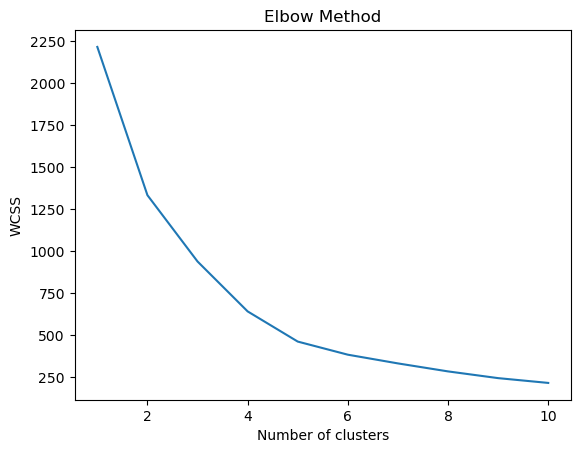

In [17]:
# create elbow graph 

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Choosing the Optimal Number of Clusters

    Based on the elbow chart, I observed that the WCSS decreases sharply up to 3 clusters, after which the rate of decrease slows down. This suggests that 3 clusters are sufficient to capture the underlying structure of the data. Adding more clusters would result in diminishing returns, making 3 clusters the optimal choice for this k-means clustering analysis.

### 3. K-means clustering

In [18]:
# Initialize the KMeans model with the optimal number of clusters

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the standardized data and predict the cluster for each data point

df_standardized['Cluster'] = kmeans.fit_predict(df_standardized)

# View the first few rows of the resulting DataFrame with the assigned clusters

df_standardized.head()

,Laps,Total_Seconds,Cluster
0,0.263890,1.001159,1
1,1.744759,3.204772,1
2,3.620527,2.234447,1
3,-1.118255,0.614991,0
4,-1.463791,2.253449,1


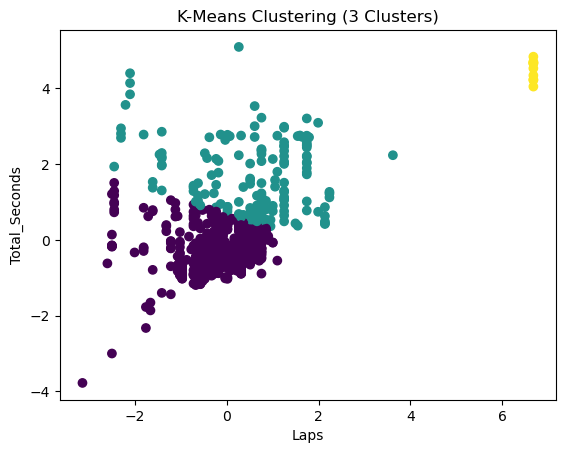

In [20]:
# plot k-means clusters

plt.scatter(df_standardized['Laps'], df_standardized['Total_Seconds'], c=df_standardized['Cluster'], cmap='viridis')
plt.xlabel('Laps')
plt.ylabel('Total_Seconds')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()

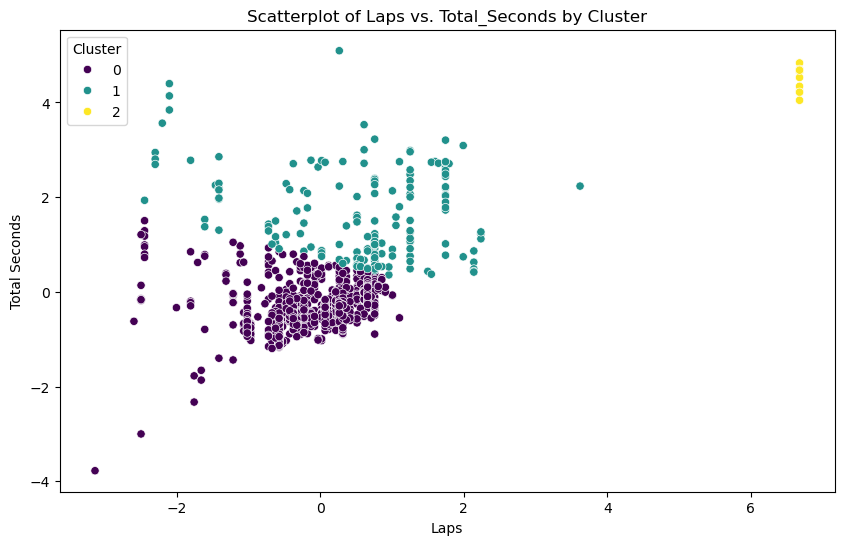

In [23]:
# scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Laps', y='Total_Seconds', hue='Cluster', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Laps vs. Total_Seconds by Cluster')
plt.xlabel('Laps')
plt.ylabel('Total Seconds')
plt.show()

/var/folders/vd/05k6yy6d1bl3qgn_9qglj0d00000gn/T/ipykernel_2750/3222335323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Seconds', data=df_standardized, palette='viridis')


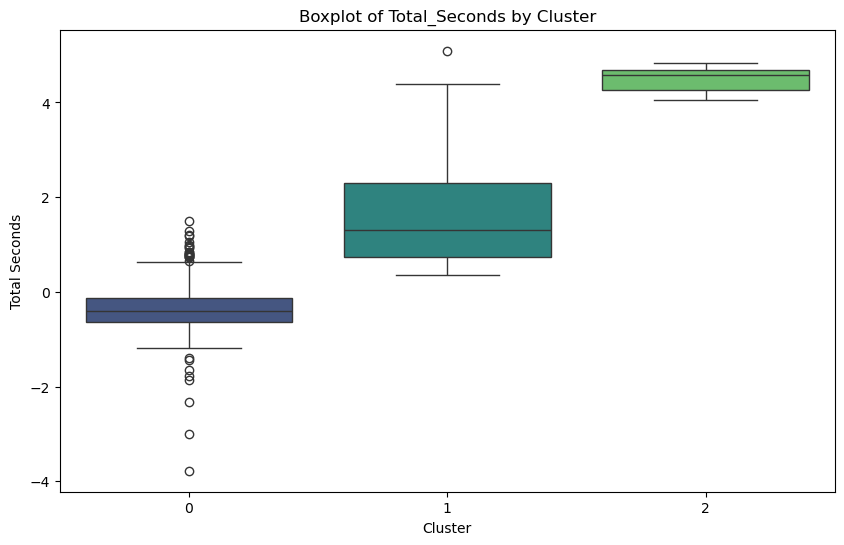

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_Seconds', data=df_standardized, palette='viridis')
plt.title('Boxplot of Total_Seconds by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Seconds')
plt.show()

#### Cluster Characteristics:

    Laps and Total_Seconds were used to define the clusters. The clusters may represent different groups of races based on the number of laps and the total time taken to complete the race.
    For example, a cluster with a lower average Total_Seconds and a higher number of Laps could indicate faster races, perhaps those with more skilled drivers or better-performing cars.
    
#### Why the Clusters Make Sense

    Logical Grouping: If the clusters align with known race types, such as sprint races versus endurance races, this indicates that the clustering successfully captured meaningful distinctions in the data.
    Performance Insights: The clusters might also reveal insights into performance trends over time, identifying periods where races were generally faster or slower, which could correlate with technological advancements or changes in race regulations.
    
#### Interpreting the Clusters:

    Cluster 1: This cluster may contain races with a moderate number of laps and a moderate amount of time to complete the race. These races could represent a "standard" race type.
    Cluster 2: If this cluster has lower lap counts and higher total times, it might represent longer, more endurance-focused races where strategy played a bigger role.
    Cluster 3: This cluster might include races with high lap counts but lower total times, indicating races with quicker laps, possibly due to circuit characteristics or weather conditions.

In [25]:
# Calculate descriptive statistics for each cluster using groupby

cluster_stats = df_standardized.groupby('Cluster').describe()

# Display the calculated statistics

print(cluster_stats)

          Laps                                                        \
         count      mean           std       min       25%       50%   
Cluster                                                                
0        922.0 -0.175874  6.335890e-01 -3.142110 -0.575269 -0.180371   
1        175.0  0.544832  1.099780e+00 -2.451037  0.017078  0.757513   
2         10.0  6.680991  9.362223e-16  6.680991  6.680991  6.680991   

                            Total_Seconds                                \
              75%       max         count      mean       std       min   
Cluster                                                                   
0        0.313252  1.103049         922.0 -0.347880  0.463638 -3.777523   
1        1.251136  3.620527         175.0  1.576244  0.960140  0.358771   
2        6.680991  6.680991          10.0  4.490223  0.262342  4.046374   

                                                 
              25%       50%       75%       max  
Cluster         

# What these results could be used for

## Race Strategy Optimization: 
    Teams could use these insights to optimize race strategies. For example, if one cluster is associated with longer races, teams might focus on tire endurance and fuel management, while clusters with shorter races might prioritize speed and quick pit stops.
## Driver Performance: 
    Analyzing driver performance within each cluster could reveal strengths and weaknesses in different types of races, helping teams and drivers prepare better for future races.